In [32]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('/Users/vaibhavshukla/Desktop/spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [10]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [11]:
df.info

<bound method DataFrame.info of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [12]:
x=df.v2
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [13]:
y.replace(to_replace='ham',value=1,inplace=True)
y.replace(to_replace='spam',value=0,inplace=True)
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64

In [14]:
y=df.v1
y.value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

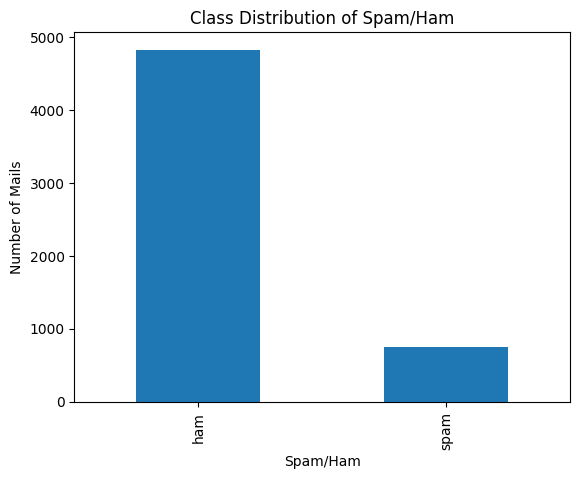

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df'

# Create a bar plot of the class distribution
class_counts = df['v1'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Spam/Ham')
plt.xlabel('Spam/Ham')
plt.ylabel('Number of Mails')
plt.show()

In [17]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [28]:
# Preprocess the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['v2'])
y = df['v1'].map({'ham': 0, 'spam': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,random_state=25)


In [3]:
from sklearn.naive_bayes import MultinomialNB

# Create a Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train, y_train)


MultinomialNB()

In [4]:
from sklearn.metrics import classification_report

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [5]:
# Example usage of the trained model for spam detection
new_email_text = ["Get a free vacation now!"]
new_email_text_transformed = vectorizer.transform(new_email_text)
prediction = classifier.predict(new_email_text_transformed)
print("Prediction:", prediction)


Prediction: [1]
